# Binding-Pocket Interactions of Four EGFR Inhibitors

For this notebook, we use mdciao to visualize the binding-pocket interactions of four **Epidermal Growth Factor Receptor (EGFR) inhibitors**. EGFR is an important drug target with implications in cancer and inflammation ([Wikipedia](https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor)). It is a transmembrane protein with an extracellular receptor domain and an intracellular kinase domain.

The molecular dynamics (MD) data used here was generated by slightly modifying the notebook 

* [T019 · Molecular dynamics simulation](https://projects.volkamerlab.org/teachopencadd/talktorials/T019_md_simulation.html)

which is part of the impressive [TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/index.html) collection, made available as teaching platform for computer-aided drug design by the [Volkamer Lab at Saarland University, Saarbrücken](https://volkamerlab.org/index.html). 


The four inhibitors and structures are chosen from the following RCSB entries:

* [*The crystal structure of EGFR T790M/C797S with the inhibitor HCD2892 (PDB ID 7VRE)*](https://www.rcsb.org/structure/7VRE)

* [*EGFR kinase domain complexed with compound 20a (PDB ID 3W32)*](https://www.rcsb.org/structure/3W32)

* [*EGFR Kinase domain complexed with tak-285 (PDB ID 3POZ)*](https://www.rcsb.org/structure/3POZ)

* [*Crystal Structure of EGFR(L858R/T790M/C797S) in complex with CH7233163 (PDB ID 6LUB)*](https://www.rcsb.org/structure/6LUB)  

Please see the references at the bottom of the notebook for more information.

In [1]:
import mdciao
import os
import matplotlib
import nglview
from glob import glob

# Consensus labeler object for KLIFS nomenclature
Since it will be used more than once, it is better to have it instantiated only once and reused many times. The only thing we need is the [UniProt Accession Code](https://www.uniprot.org/uniprot/P00533) of the EGFR, `P00533`.

In [2]:
KLIFS = mdciao.nomenclature.LabelerKLIFS("UniProtAC:P00533")

No local file ./KLIFS_UniProtAC:P00533.xlsx found, checking online in
https://klifs.net/api/kinase_ID?kinase_name=UniProtAC:P00533 ...https://klifs.net/api/structures_list?kinase_ID=406
done!
Please cite the following reference to the KLIF structural database:
 * Kanev et al, (2021) KLIFS: an overhaul after the first 5 years of supporting kinase research
   Nucleic Acids Research 49, D562--D569
   https://doi.org/10.1093/NAR/GKAA895
For more information, call mdciao.nomenclature.references()


/home/perezheg/miniconda3/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:208: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


# Download example data

In [3]:
if not os.path.exists("example_kinases"):
    mdciao.examples.fetch_example_data("EGFR");

Unzipping to 'example_kinases'


# Guess molecular fragments 

In [4]:
for pdb in sorted(glob("example_kinases/*.pdb")):
    print(pdb)
    mdciao.fragments.get_fragments(pdb)
    print()

example_kinases/topology.3POZ.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    317 AAs   GLN701 (   0) -  LEU1017 (316 ) (0)
fragment      1 with      1 AAs     03P1 ( 317) -     03P1 (317 ) (1)

example_kinases/topology.3W32.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    317 AAs   GLN701 (   0) -  LEU1017 (316 ) (0)
fragment      1 with      1 AAs     W321 ( 317) -     W321 (317 ) (1)

example_kinases/topology.6LUB.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    323 AAs   GLY696 (   0) -  ILE1018 (322 ) (0)
fragment      1 with      1 AAs     EUX1 ( 323) -     EUX1 (323 ) (1)

example_kinases/topology.7VRE.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    323 AAs   GLY696 (   0) -  ILE1018 (322 ) (0)
fragment      1 with      1 AAs     7VH1 ( 323) -     7VH1 (323 ) (1)



All three setups share the equivalent topology of kinase (fragment 0) and ligand (fragment 1):
 
 * from PDB ID `3POZ` ligand `03P1`  
 
 * from PDB ID `3W32` ligand `W321` 
 
 * from PDB ID `6LUB` ligand `EUX1` 
 
 * from PDB ID `7VRE` ligand `7VH1` 


For labelling purposes, create a mapping between PDB IDs and ligand names:

In [5]:
pdb2lig = {"3POZ" : "03P1",
           "3W32" : "W321",
           "6LUB" : "EUX1", 
           "7VRE" : "7VH1"
          }

# Compute the ligand-kinase interactions for the four inhibitors  

In [6]:
binding_pocket = {}
for pdb in sorted(glob("example_kinases/*.pdb")):
    key = os.path.basename(pdb).split(".")[1]
    key="%s@%s"%(pdb2lig[key], key)
    xtc = pdb.replace(".pdb",".xtc").replace("topology","trajectory")
    binding_pocket[key]=mdciao.cli.interface(xtc, 
                                             pdb, 
                                             fragment_names=["EGFR", "ligand"],
                                             KLIFS_string=KLIFS, 
                                             ctc_control=1.0, 
                                             interface_selection_1=[0],
                                             interface_selection_2=[1],
                                             accept_guess=True, figures=False, no_disk=True)
    

Will compute contact frequencies for trajectories:
example_kinases/trajectory.3POZ.xtc
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment EGFR   with    317 AAs   GLN701 (   0) -  LEU1017 (316 ) (EGFR)
fragment ligand with      1 AAs     03P1 ( 317) -     03P1 (317 ) (ligand)
The KLIFS-labels align best with fragments: [0] (first-last: GLN701-LEU1017).

Mapping the KLIFS fragments onto your topology:
 I      with      3 AAs   LYS716@I.1       (  15) -   LEU718@I.3       (17  ) (I)
 g.l    with      6 AAs   GLY719@g.l.4     (  18) -   GLY724@g.l.9     (23  ) (g.l)
 II     with      4 AAs   THR725@II.10     (  24) -   LYS728@II.13     (27  ) (II)
 III    with      6 AAs   VAL742@III.14    (  41) -   LEU747@III.19    (46  ) (III)
 αC     with     11 AAs   GLU758@αC.20     (  57) -   SER768@αC.30     (67  ) (αC)
 b.l    with      7 AAs   VAL769@b.l.31    (  68) -   ARG776@b.l.37    (75  ) (b.l) resSeq jumps
 IV     with      4 AAs   LEU777@IV.38     (

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 220 (from 317) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 30 contacts capture 25.13 (~99%) of the total frequency 25.28 (over 36 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 25 ctcs already capture 90.0% of 25.28.
The 25-th contact has a frequency of 0.55.

    freq             label              residues  fragments   sum 
1   1.00  L792@hinge.47  - 03P1@ligand   91 - 317    0 - 1    1.00
2   1.00  M793@hinge.48  - 03P1@ligand   92 - 317    0 - 1    2.00
3   1.00  L777@IV.38     - 03P1@ligand   76 - 317    0 - 1    3.00
4   1.00  L844@VII.77    - 03P1@ligand  143 - 317    0 - 1    4.00
5   1.00  T854@xDFG.80   - 03P1@ligand  153 - 317    0 - 1    5.00
6   1.00  D855@xDFG.81   - 03P1@ligand  154 - 317    0 - 1    6.00
7   1.00  F856@xDFG.82   - 03P1@ligand  155 - 317    0 - 1    7.00
8   1.00  T790@GK.45     - 03P1@ligand   89 - 317    0 - 1    8.00
9   1.00  K745@III.17    - 03P1@ligand   44 - 317    0 - 1    9.00
10  1.00  C775@b.l.36    - 03P1@ligand   74 - 317    0 - 1   10.00
11  1.00  Q

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 200 (from 317) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 31 contacts capture 26.59 (~100%) of the total frequency 26.67 (over 34 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 25 ctcs already capture 90.0% of 26.67.
The 25-th contact has a frequency of 0.81.

    freq             label              residues  fragments   sum 
1   1.00  T790@GK.45     - W321@ligand   89 - 317    0 - 1    1.00
2   1.00  L792@hinge.47  - W321@ligand   91 - 317    0 - 1    2.00
3   1.00  C775@b.l.36    - W321@ligand   74 - 317    0 - 1    3.00
4   1.00  L788@V.43      - W321@ligand   87 - 317    0 - 1    4.00
5   1.00  T854@xDFG.80   - W321@ligand  153 - 317    0 - 1    5.00
6   1.00  D855@xDFG.81   - W321@ligand  154 - 317    0 - 1    6.00
7   1.00  F856@xDFG.82   - W321@ligand  155 - 317    0 - 1    7.00
8   1.00  K745@III.17    - W321@ligand   44 - 317    0 - 1    8.00
9   1.00  L777@IV.38     - W321@ligand   76 - 317    0 - 1    9.00
10  1.00  Q791@hinge.46  - W321@ligand   90 - 317    0 - 1   10.00
11  1.00  

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 190 (from 323) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 25 contacts capture 20.50 (~98%) of the total frequency 20.83 (over 39 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 20 ctcs already capture 90.0% of 20.83.
The 20-th contact has a frequency of 0.64.

    freq             label              residues  fragments   sum 
1   1.00  G796@linker.51 - EUX1@ligand  100 - 323    0 - 1    1.00
2   1.00  V726@II.11     - EUX1@ligand   30 - 323    0 - 1    2.00
3   1.00  P794@linker.49 - EUX1@ligand   98 - 323    0 - 1    3.00
4   1.00  L718@I.3       - EUX1@ligand   22 - 323    0 - 1    4.00
5   1.00  M793@hinge.48  - EUX1@ligand   97 - 323    0 - 1    5.00
6   1.00  L844@VII.77    - EUX1@ligand  148 - 323    0 - 1    6.00
7   1.00  L792@hinge.47  - EUX1@ligand   96 - 323    0 - 1    7.00
8   1.00  Q791@hinge.46  - EUX1@ligand   95 - 323    0 - 1    8.00
9   1.00  M790@GK.45     - EUX1@ligand   94 - 323    0 - 1    9.00
10  1.00  A743@III.15    - EUX1@ligand   47 - 323    0 - 1   10.00
11  0.98  G

HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

Reduced to only 212 (from 323) residue pairs for the computation of actual residue-residue distances:


HTML(value='<style> .no-border textarea { border: none; resize: none; min-width: 151ch} </style>')

Textarea(value='Processing trajectories: 0/1 [  0%]. Frames processed:        0. Elapsed time: hh:mm:ss. Remai…

The following 23 contacts capture 16.70 (~99%) of the total frequency 16.79 (over 30 contacts with nonzero frequency at 4.50 Angstrom).
As orientation value, the first 17 ctcs already capture 90.0% of 16.79.
The 17-th contact has a frequency of 0.53.

    freq             label              residues  fragments   sum 
1   1.00  L718@I.3       - 7VH1@ligand   22 - 323    0 - 1    1.00
2   1.00  M793@hinge.48  - 7VH1@ligand   97 - 323    0 - 1    2.00
3   1.00  L792@hinge.47  - 7VH1@ligand   96 - 323    0 - 1    3.00
4   1.00  V726@II.11     - 7VH1@ligand   30 - 323    0 - 1    4.00
5   1.00  A743@III.15    - 7VH1@ligand   47 - 323    0 - 1    5.00
6   1.00  P794@linker.49 - 7VH1@ligand   98 - 323    0 - 1    6.00
7   1.00  G796@linker.51 - 7VH1@ligand  100 - 323    0 - 1    6.99
8   1.00  Q791@hinge.46  - 7VH1@ligand   95 - 323    0 - 1    7.99
9   0.99  L844@VII.77    - 7VH1@ligand  148 - 323    0 - 1    8.98
10  0.96  F723@g.l.8     - 7VH1@ligand   27 - 323    0 - 1    9.93
11  0.93  G

# Compare interactions across the four compounds in a violinplot
Additionally, we will display *representative* geometries directly on the violinplots via their residue-residue distance-values. Subsequently, we will view these geometries in 3D

Returning frame 83 of traj nr. 0: example_kinases/trajectory.3POZ.xtc
Returning frame 237 of traj nr. 0: example_kinases/trajectory.3W32.xtc
Returning frame 369 of traj nr. 0: example_kinases/trajectory.6LUB.xtc
Returning frame 304 of traj nr. 0: example_kinases/trajectory.7VRE.xtc


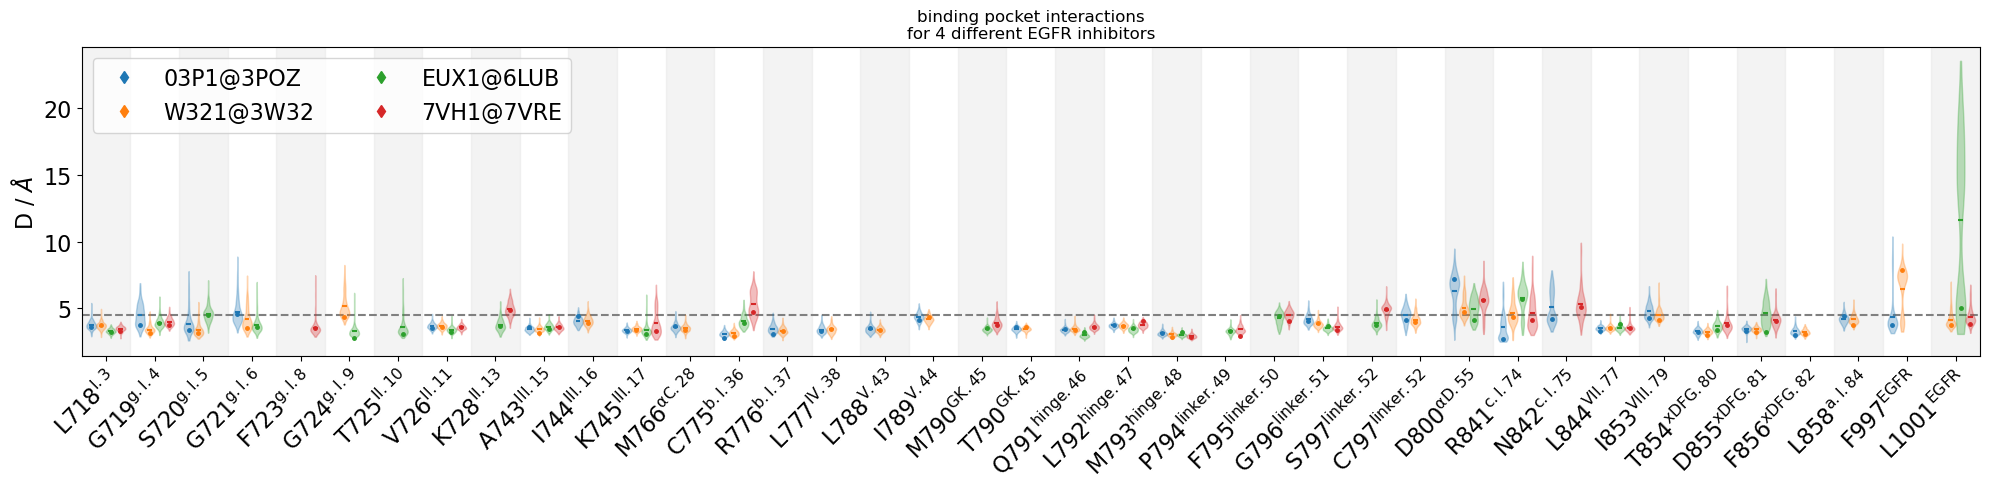

In [7]:
colors = mdciao.plots.color_dict_guesser("tab10", binding_pocket.keys())
myfig, myax, keys, representatives = mdciao.plots.compare_violins(binding_pocket,
                                                                  colors=colors,           
                                                                  anchor="ligand", 
                                                                  ctc_cutoff_Ang=4.5,
                                                                  mutations_dict={
                                                                      "EUX1": "ligand",
                                                                      "7VH1": "ligand",
                                                                      "W321": "ligand",
                                                                      "03P1": "ligand"
                                                                  },
                                                                  defrag=None,
                                                                  sort_by="residue",
                                                                  legend_rows=2,   
                                                                  representatives=True,   
                                                                  figsize=(20,5)                                                                  
                                                         )
myax.set_title("binding pocket interactions"
               "\nfor 4 different EGFR inhibitors")
myfig.tight_layout()
#myfig.savefig("EGFR.png", bbox_inches="tight")

# Show the representative geometries
The object `representatives` is a dictionary containing the geometries behind the small dots inside the violins of the previous figure, using the [repframes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.repframes) method. In the next cells we will first align them and then overlap them using the KLIFS nomenclature.

# Superpose structures using the KLIFs alignment labels
This way, the alignment will be particularly good in the binding pocket

In [8]:
KLIFS_alignment = mdciao.nomenclature.AlignerConsensus({key : KLIFS for key in binding_pocket.keys()},
                                                       tops={key : bp.top for key, bp in binding_pocket.items()})
                                                       
KLIFS_alignment.AAresSeq

consensus 03P1@3POZ W321@3W32 EUX1@6LUB 7VH1@7VRE
0        I.1      K716      K716      K716      K716
1        I.2      V717      V717      V717      V717
2        I.3      L718      L718      L718      L718
3      g.l.4      G719      G719      G719      G719
4      g.l.5      S720      S720      S720      S720
..       ...       ...       ...       ...       ...
80   xDFG.81      D855      D855      D855      D855
81   xDFG.82      F856      F856      F856      F856
82   xDFG.83      G857      G857      G857      G857
83    a.l.84      L858      L858      R858      L858
84    a.l.85      A859      A859      A859      A859

[85 rows x 5 columns]

In [9]:
# We can directly get CA indices to map atoms
KLIFS_alignment.CAidxs

consensus  03P1@3POZ  W321@3W32  EUX1@6LUB  7VH1@7VRE
0        I.1        280        280        340        340
1        I.2        302        302        362        362
2        I.3        318        318        378        378
3      g.l.4        337        337        397        397
4      g.l.5        344        344        404        404
..       ...        ...        ...        ...        ...
80   xDFG.81       2515       2515       2578       2578
81   xDFG.82       2527       2527       2590       2590
82   xDFG.83       2547       2547       2610       2610
83    a.l.84       2554       2554       2617       2617
84    a.l.85       2573       2573       2641       2636

[85 rows x 5 columns]

In [10]:
ref_key = "W321@3W32" # We take this one but could be any one
ref_geom = representatives[ref_key]
for key, geom in representatives.items():
    if key!=ref_key:
        ref_CAs, key_CAs = KLIFS_alignment.CAidxs[[ref_key, key]].values.T.astype(int)
        geom.superpose(ref_geom, atom_indices=key_CAs, ref_atom_indices=ref_CAs)
        

# Visualize residues with different behaviors in each compound
For example, residues 

* `775@b.l.36` 

* `841@c.l.74` 

* `855@xDFG.81`

* `997@EGFR` (doesn't have a KLIFS label)

In [12]:
colors = {key: matplotlib.colors.to_hex(col) for key, col in colors.items()}
iwd = nglview.NGLWidget()
for ii, (key, rep) in enumerate(representatives.items()):
    iwd.add_trajectory(rep)
    iwd.clear_representations(component=ii)
    iwd.add_cartoon(color="white", component=ii)
    iwd.add_licorice(color=colors[key], component=ii, selection="(775 841 855 997) and not Hydrogen", radius=.1)
    iwd.add_ball_and_stick(color=colors[key], component=ii, 
                          selection="not protein and not Hydrogen",
                           radius=.1,
                          )
iwd

NGLWidget()

# References

* [The crystal structure of EGFR T790M/C797S with the inhibitor HCD2892 (PDB ID 7VRE)](https://www.rcsb.org/structure/7VRE)
  * Chen, H., Lai, M., Zhang, T., Chen, Y., Tong, L., Zhu, S., … Ding, K. (2022).   
    Conformational Constrained 4-(1-Sulfonyl-3-indol)yl-2-phenylaminopyrimidine Derivatives as New Fourth-Generation Epidermal Growth Factor Receptor Inhibitors Targeting T790M/C797S Mutations.   
    Journal of Medicinal Chemistry, 65(9), 6840–6858.   
    https://doi.org/10.1021/acs.jmedchem.2c00168
* [EGFR kinase domain complexed with compound 20a (PDB ID 3W32)](https://www.rcsb.org/structure/3W32)
  * Kawakita, Y., Seto, M., Ohashi, T., Tamura, T., Yusa, T., Miki, H., … Ishikawa, T. (2013).   
    Design and synthesis of novel pyrimido[4,5- b ]azepine derivatives as HER2/EGFR dual inhibitors.   
    Bioorganic & Medicinal Chemistry, 21(8), 2250–2261.   
    https://doi.org/10.1016/j.bmc.2013.02.014
* [EGFR Kinase domain complexed with tak-285 (PDB ID 3POZ)](https://www.rcsb.org/structure/3POZ)
  * Aertgeerts, K., Skene, R., Yano, J., Sang, B. C., Zou, H., Snell, G., … Sogabe, S. (2011).   
    Structural analysis of the mechanism of inhibition and allosteric activation of the kinase domain of HER2 protein.  
    Journal of Biological Chemistry, 286(21), 18756–18765.  
    https://doi.org/10.1074/jbc.M110.206193
* [Crystal Structure of EGFR(L858R/T790M/C797S) in complex with CH7233163 (PDB ID 6LUB)](https://www.rcsb.org/structure/6LUB)  
  * Kashima, K., Kawauchi, H., Tanimura, H., Tachibana, Y., Chiba, T., Torizawa, T., & Sakamoto, H. (2020).  
    CH7233163 Overcomes Osimertinib-Resistant EGFR-Del19/T790M/C797S Mutation.   
    Molecular Cancer Therapeutics, 19(11), 2288–2297.  
    https://doi.org/10.1158/1535-7163.MCT-20-0229